# **Generalization with CORS-ADD-HBB Data**

<p align="center">
    <img src="https://github.com/RSandAI/Comprehensive-YOLO-Airplane-Detection/blob/main/assets/image.png" height=450 width=1280 alt=""/>
</p>

<small>Picture Source: <a href="https://github.com/RSandAI/Comprehensive-YOLO-Airplane-Detection/">RSandAI, Comprehensive YOLO Airplane Detection</a></small>

<br>

## **Context**

The HRPlanes dataset is a valuable resource in the domain of computer vision, particularly for tasks related to object detection, specifically focusing on aircraft within Very High Resolution (VHR) Google Earth images. This dataset comprises 3101 RGB images of major airports and aircraft boneyards, manually annotated with bounding boxes for airplanes using Plainsight (formerly HyperLabel). Quality control was conducted independently, resulting in 18,477 annotated airplanes. The dataset is split into 70% training (2170 images), 20% validation (620 images), and 10% testing (311 images) sets.

<br>

To facilitate accurate training and evaluation, each aircraft within the images has been meticulously labeled, resulting in a comprehensive annotation set covering a total of 18,477 aircraft instances. These annotations provide bounding box coordinates for each detected aircraft within the corresponding images.

<br>

## **Generalization with CORS-ADD-HBB Data**

Generalization, the ability of a machine learning model to perform well on unseen data, is a critical aspect of model evaluation. In this study, we aim to assess the generalization performance of our top 6 YOLOv8 models using the CORS-ADD-HBB dataset. The CORS-ADD-HBB dataset, a curated collection of diverse data points, offers a comprehensive testbed for evaluating model robustness and adaptability across various domains. Leveraging this dataset, we seek to explore the extent to which our YOLOv8 models can effectively generalize beyond their training data, providing insights into their real-world applicability and reliability.

**Top 6 Models:**

| Rank | Experiment ID | Model | Network size | Optimizer | Augmentation | F1 Score | Precision | Recall | mAP50 | mAP75 | mAP50-95 |
|--|--|--|--|--|--|--|--|--|--|--|--|
| 1 | 12 | YOLOv8x | 960x960 | SGD | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9932 | 0.9915 | 0.9950 | 0.9939 | 0.9925 | 0.8990 |
| 2 | 32 | YOLOv8l | 960x960 | ADAMW | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9930 | 0.9927 | 0.9933 | 0.9936 | 0.9887 | 0.9025 |
| 3 | 30 | YOLOv8l | 960x960 | SGD | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9922 | 0.9903 | 0.9940 | 0.9941 | 0.9917 | 0.9021 |
| 4 | 28 | YOLOv8l | 960x960 | ADAM | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9921 | 0.9915 | 0.9928 | 0.9940 | 0.9879 | 0.9018 |
| 5 | 14 | YOLOv8x | 960x960 | ADAMW | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9920 | 0.9915 | 0.9924 | 0.9938 | 0.9895 | 0.9020 |
| 6 | 50 | YOLOv8s | 960x960 | ADAMW | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9918 | 0.9934 | 0.9903 | 0.9940 | 0.9900 | 0.8983 |

<br>

Make sure your runtime is **GPU** (_not_ CPU or TPU). And if it is an option, make sure you are using _Python 3_. You can select these settings by going to `Runtime -> Change runtime type -> Select the above mentioned settings and then press SAVE`.

## **0. Initial Steps**

### **0.1 Download Library**

In [ ]:
!pip install ultralytics -q

### **0.2. Import Libraries and Connect Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shutil
import seaborn as sns
import os
from ultralytics import YOLO

### **0.3. Define Paths of Model Weights**

In [ ]:
# @markdown ---

MODEL_1_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8x/Experiment_No_12/detect/train/weights/best.pt' # @param {type:"string"}
MODEL_2_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8l/Experiment_No_32/detect/train/weights/best.pt' # @param {type:"string"}
MODEL_3_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8l/Experiment_No_28/detect/train/weights/best.pt' # @param {type:"string"}
MODEL_4_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8l/Experiment_No_30/detect/train/weights/best.pt' # @param {type:"string"}
MODEL_5_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8s/Experiment_No_50/detect/train/weights/best.pt' # @param {type:"string"}
MODEL_6_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8x/Experiment_No_14/detect/train/weights/best.pt' # @param {type:"string"}


## **1. Validate Models with CORS-ADD-HBB Data**

The A100 GPU is a powerful graphics processing unit (GPU) developed by NVIDIA. It is part of the NVIDIA Ampere architecture and is designed for high-performance computing tasks, including deep learning, data analytics, and scientific computing. The A100 GPU offers significant improvements in performance and efficiency compared to previous GPU models, making it ideal for demanding AI and machine learning applications.

In [ ]:
!nvidia-smi

Sun May 19 19:49:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
def calculate_accuracy(TP, FN, FP):

    accuracy = (TP) / (TP + FN + FP)

    return accuracy

### **1.1. Validate Model 1**

In [ ]:
model = YOLO(MODEL_1_PT)
metrics = model.val(data='/content/coco_test.yaml')

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:32<00:00,  3.35it/s]


                   all       1722       7769      0.903      0.745      0.844       0.45
Speed: 0.6ms preprocess, 12.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.8441 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.4225 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.4499 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9033 - Mean Precision of all classes.
metrics.box.mr: 0.7453 - Mean Recall of all classes.
metrics.box.p: 0.9033 - Precision for each class.
metrics.box.r: 0.7453 - Recall for each class.
metrics.box.f1: 0.8167 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9033 - Percentage of correct positive predictions.
Recall: 0.7453 - Percentage of actual positives that were correctly predicted.
mAP50: 0.8441 - Mean Average Precision at 50% IOU.
mAP50-95: 0.4499 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.8167 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

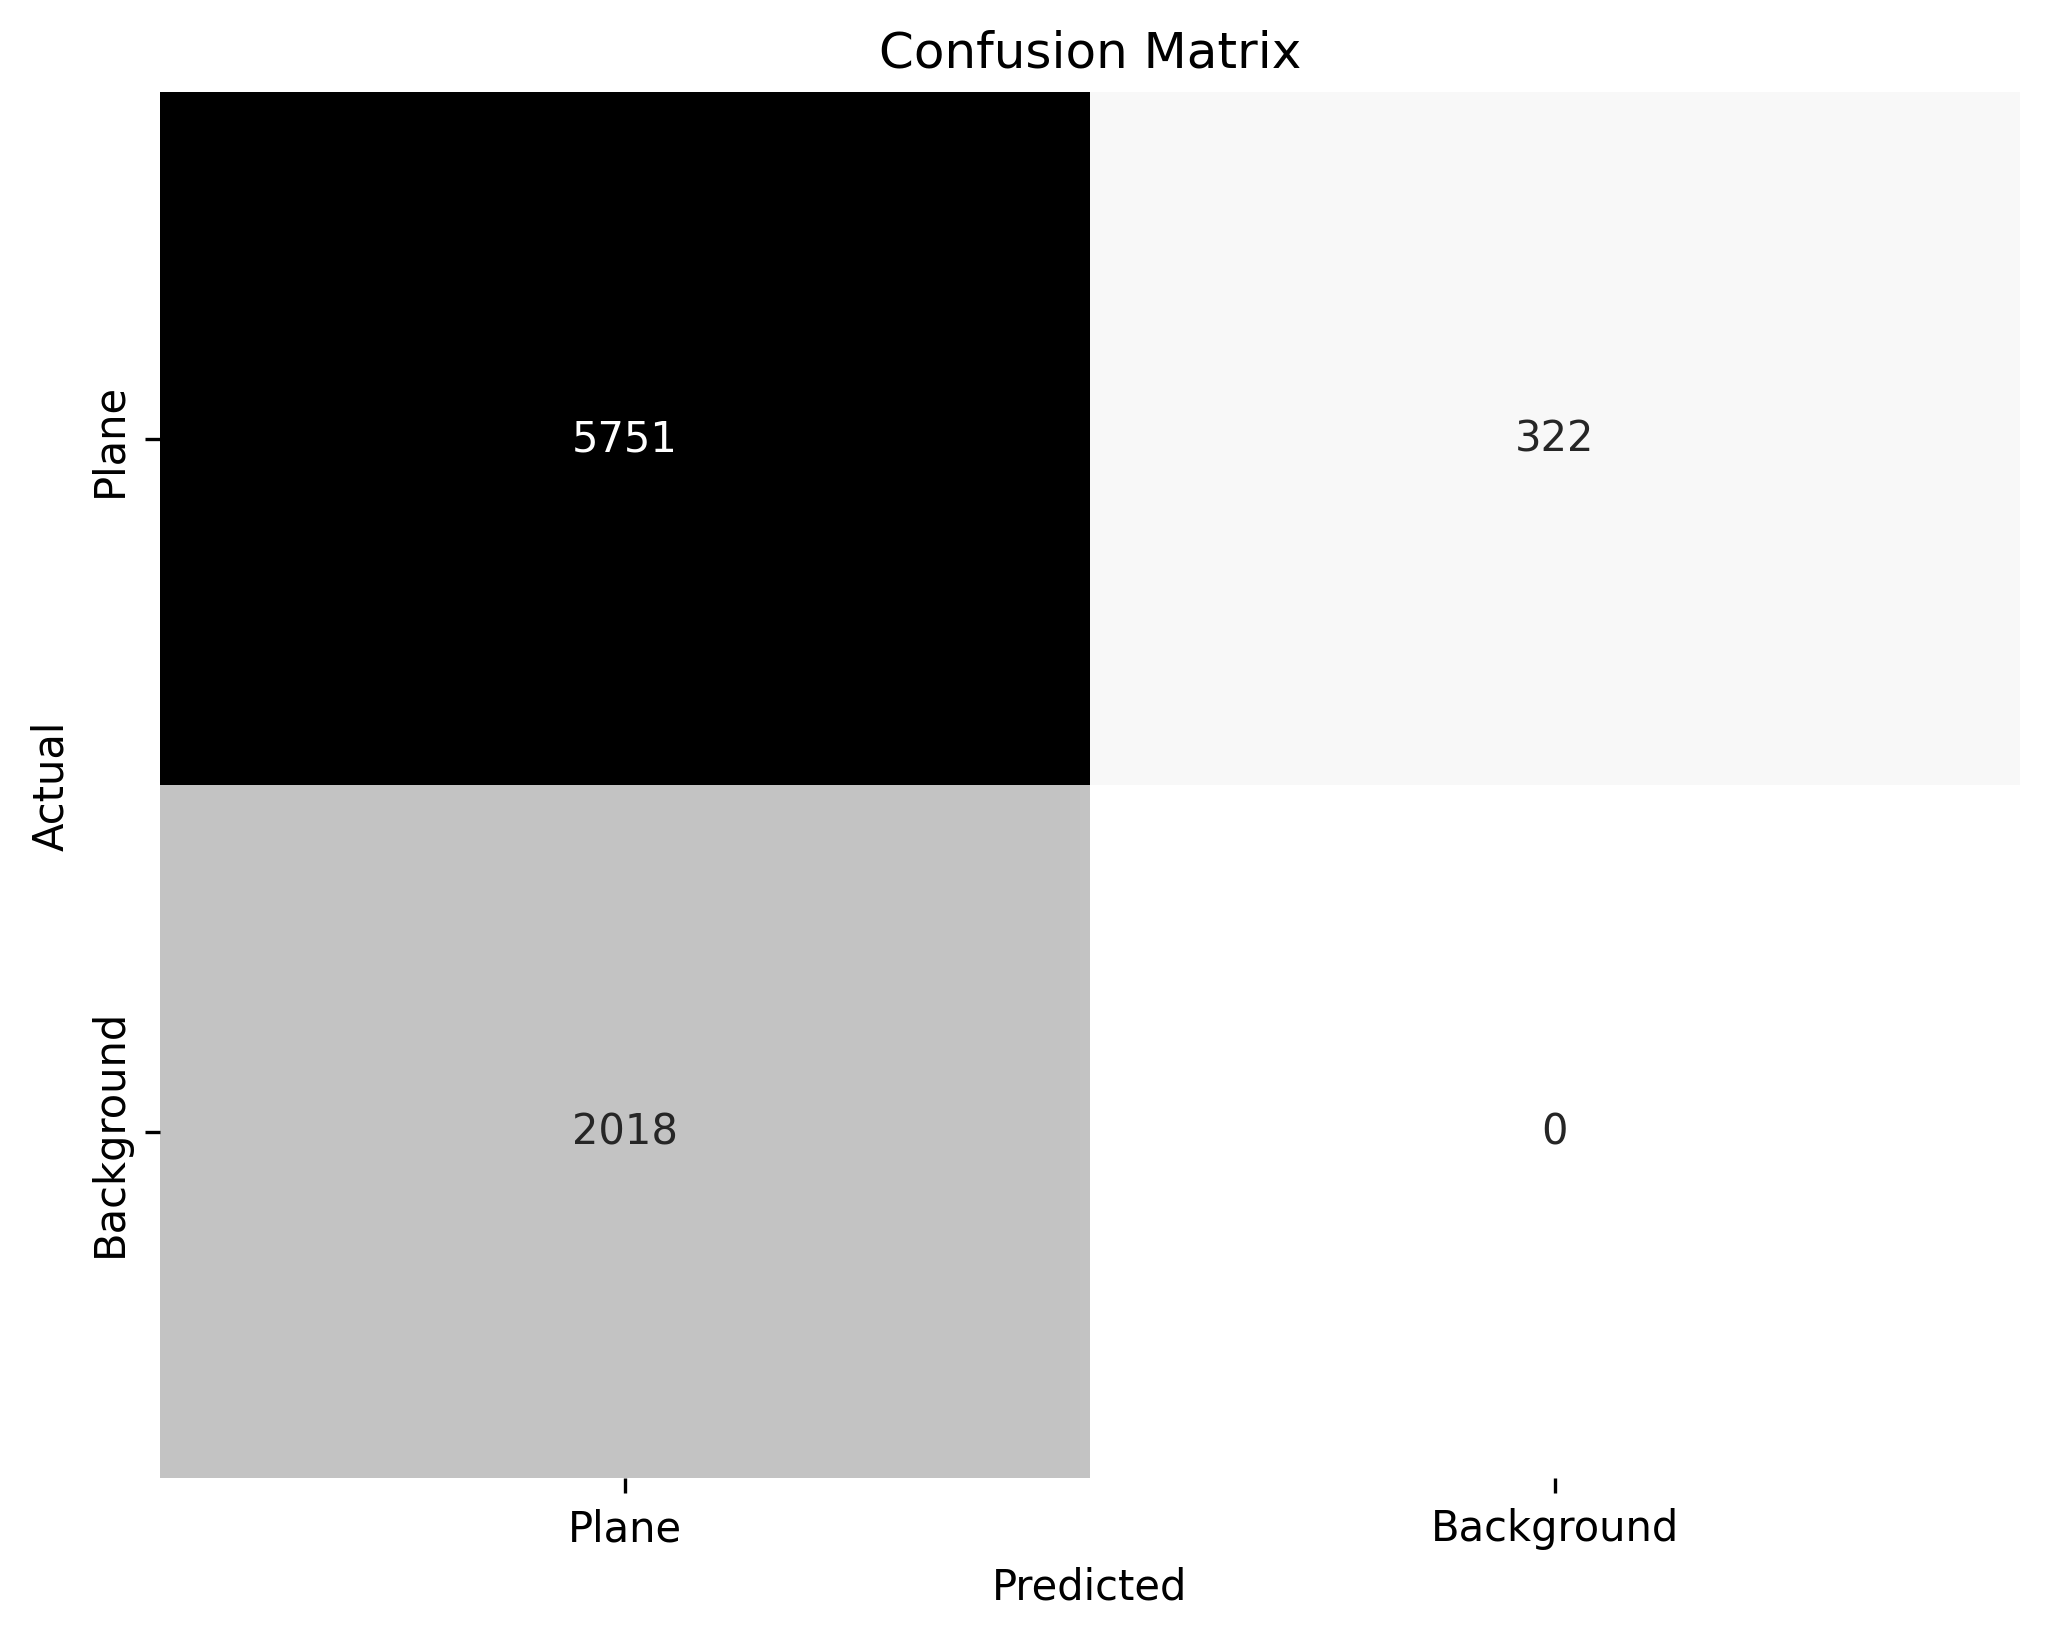

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.7108


### **1.2. Validate Model 2**

In [ ]:
model = YOLO(MODEL_2_PT)
metrics = model.val(data='/content/coco_test.yaml')

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.34it/s]


                   all       1722       7769      0.898      0.731      0.827      0.428
Speed: 0.5ms preprocess, 8.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.8265 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.3870 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.4278 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.8981 - Mean Precision of all classes.
metrics.box.mr: 0.7311 - Mean Recall of all classes.
metrics.box.p: 0.8981 - Precision for each class.
metrics.box.r: 0.7311 - Recall for each class.
metrics.box.f1: 0.8060 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.8981 - Percentage of correct positive predictions.
Recall: 0.7311 - Percentage of actual positives that were correctly predicted.
mAP50: 0.8265 - Mean Average Precision at 50% IOU.
mAP50-95: 0.4278 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.8060 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

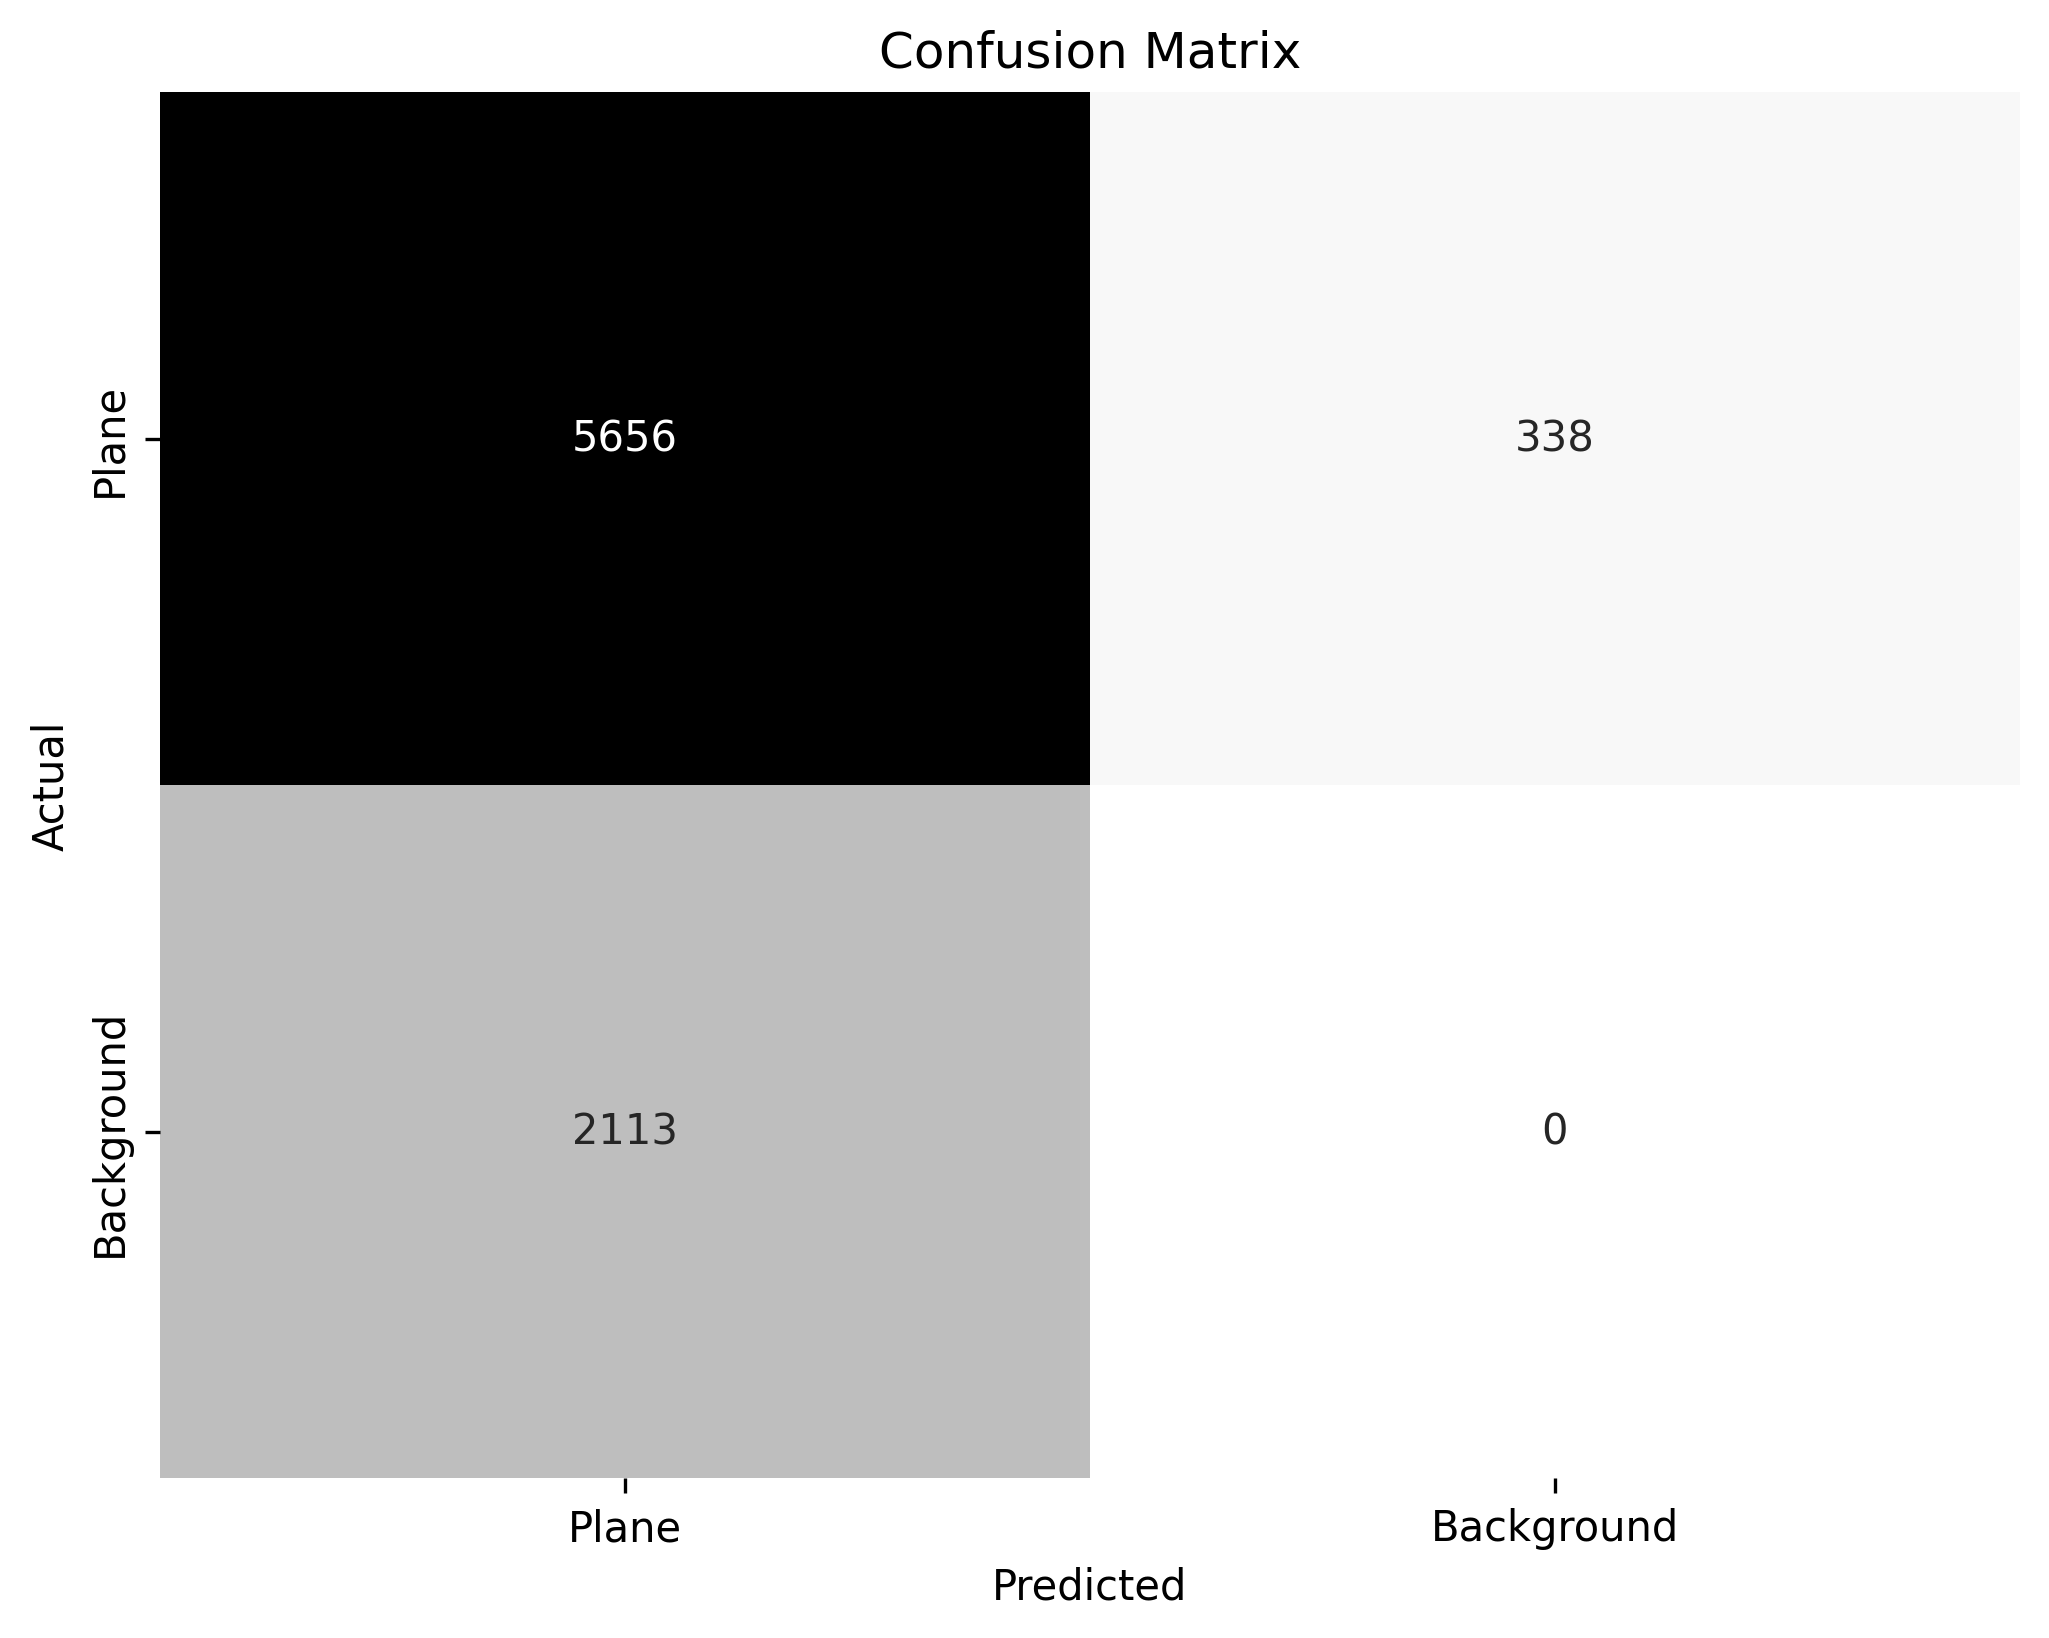

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.6977


### **1.3. Validate Model 3**

In [ ]:
model = YOLO(MODEL_3_PT)
metrics = model.val(data='/content/coco_test.yaml')

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:36<00:00,  2.94it/s]


                   all       1722       7769      0.901      0.729      0.827      0.424
Speed: 0.6ms preprocess, 8.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.8272 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.3783 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.4239 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9014 - Mean Precision of all classes.
metrics.box.mr: 0.7294 - Mean Recall of all classes.
metrics.box.p: 0.9014 - Precision for each class.
metrics.box.r: 0.7294 - Recall for each class.
metrics.box.f1: 0.8063 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9014 - Percentage of correct positive predictions.
Recall: 0.7294 - Percentage of actual positives that were correctly predicted.
mAP50: 0.8272 - Mean Average Precision at 50% IOU.
mAP50-95: 0.4239 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.8063 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

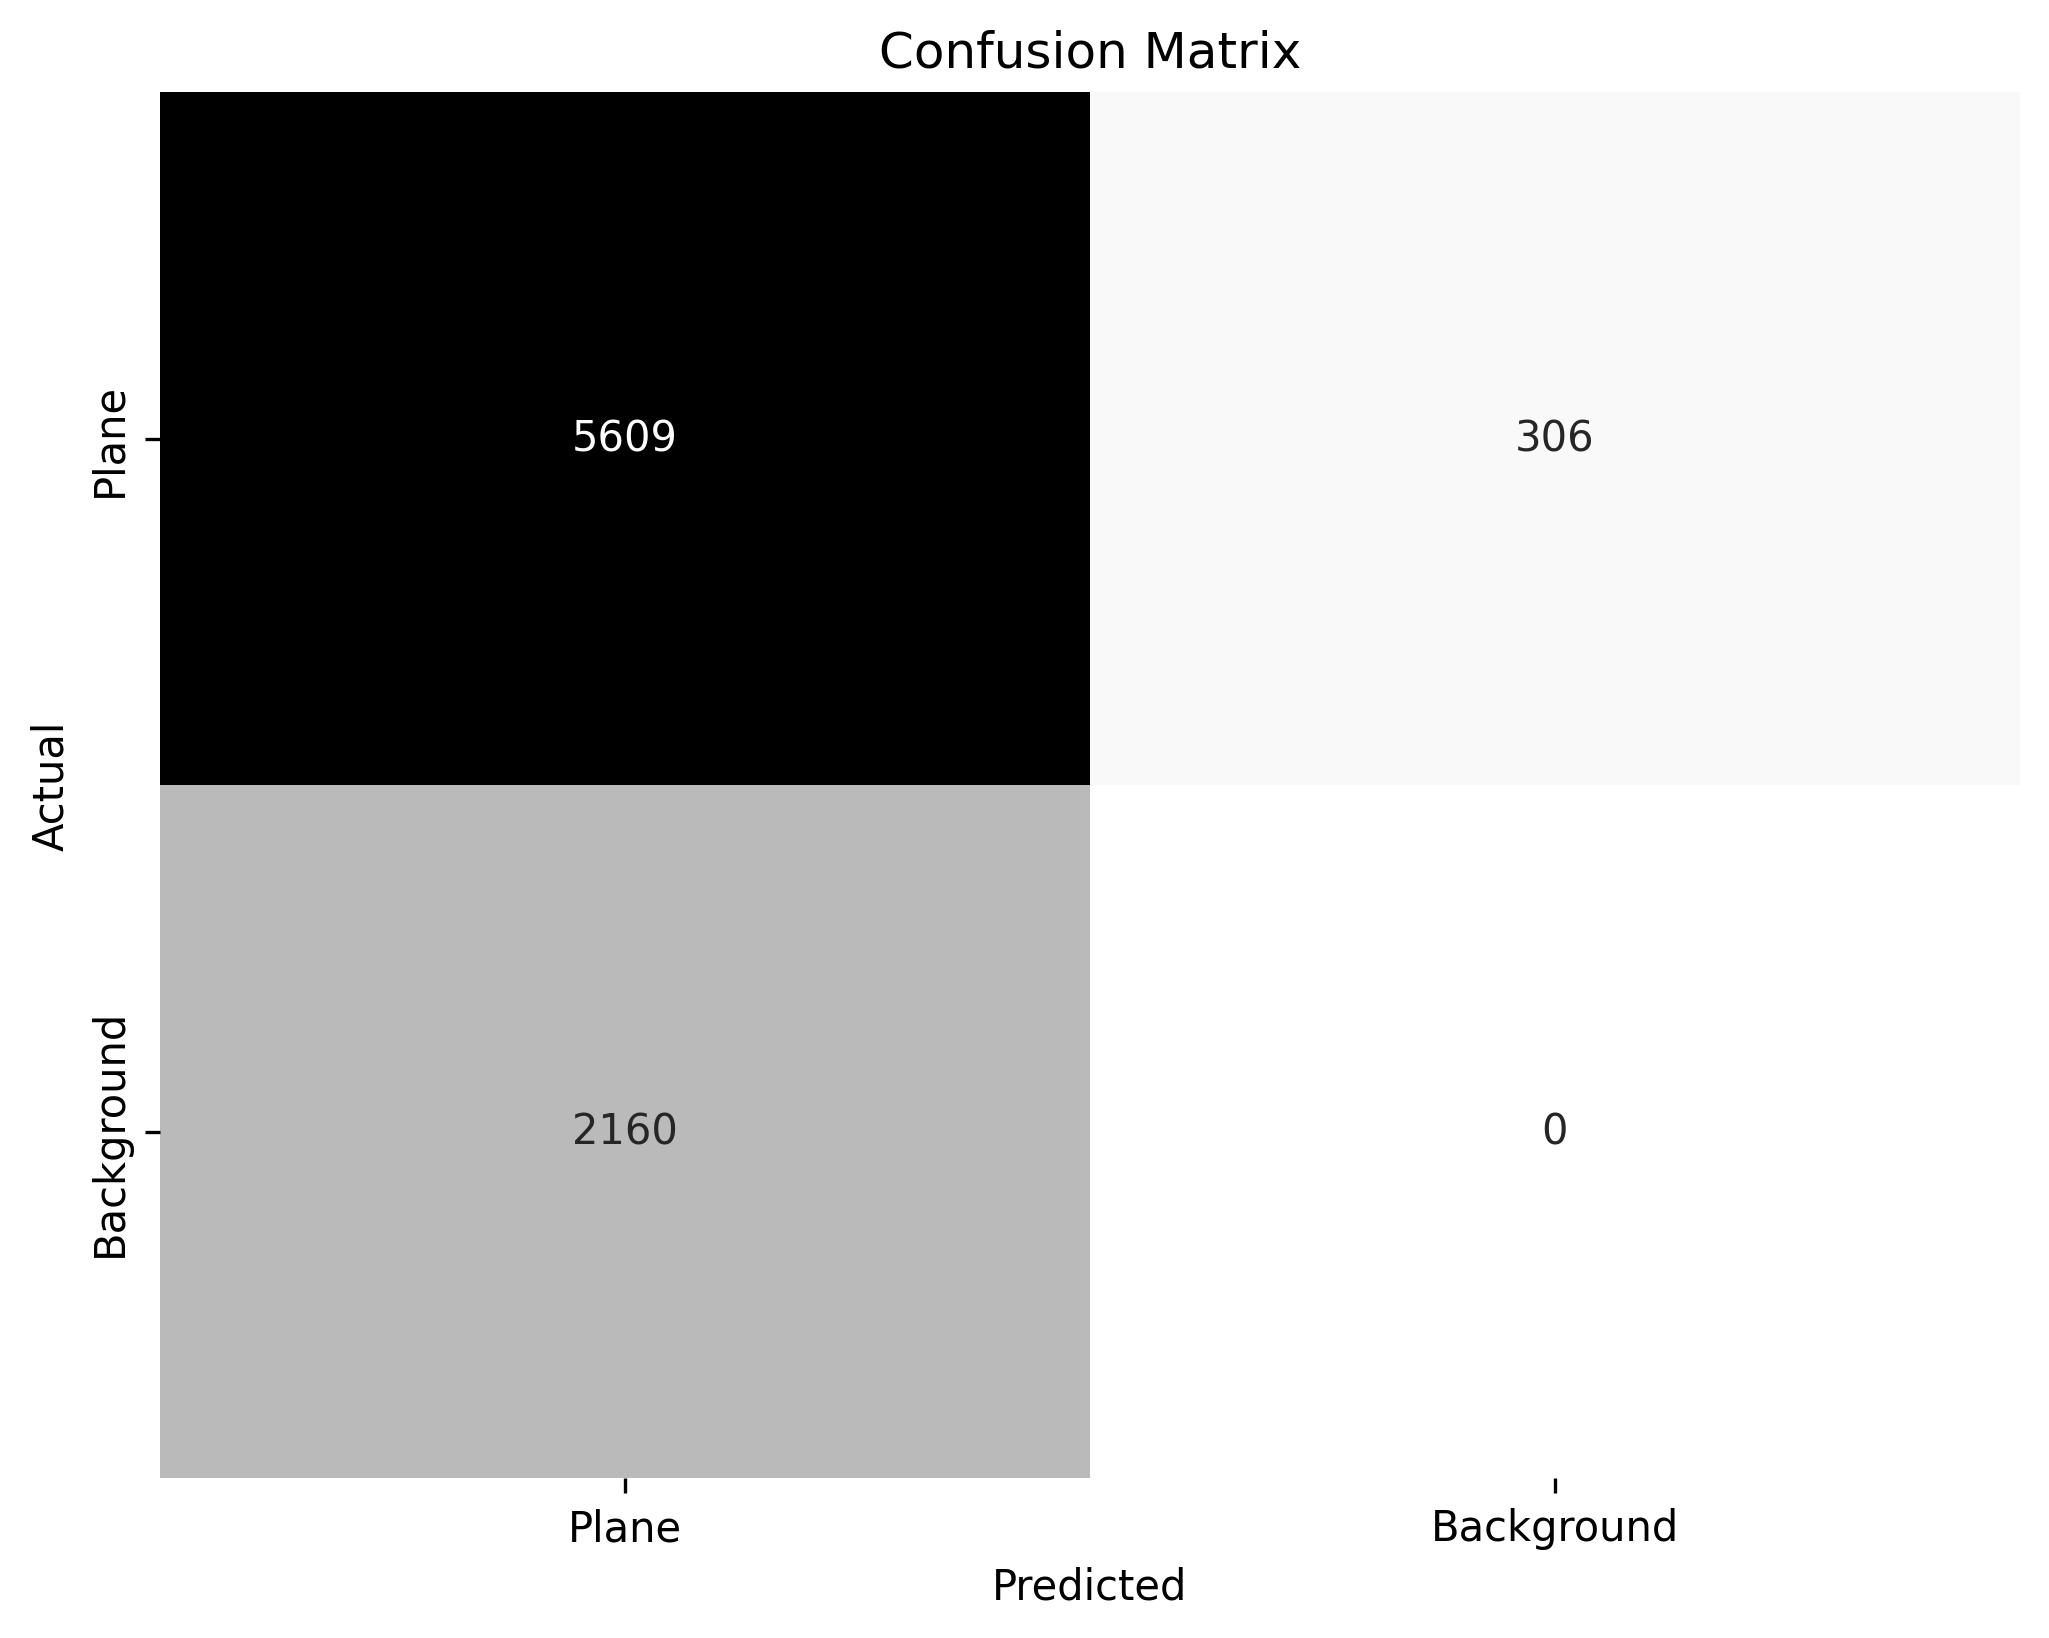

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.6946


### **1.4. Validate Model 4**

In [ ]:
model = YOLO(MODEL_4_PT)
metrics = model.val(data='/content/coco_test.yaml')

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:25<00:00,  4.30it/s]


                   all       1722       7769      0.905      0.744       0.84      0.443
Speed: 0.5ms preprocess, 8.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val4


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.8398 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.4073 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.4430 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9053 - Mean Precision of all classes.
metrics.box.mr: 0.7442 - Mean Recall of all classes.
metrics.box.p: 0.9053 - Precision for each class.
metrics.box.r: 0.7442 - Recall for each class.
metrics.box.f1: 0.8169 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9053 - Percentage of correct positive predictions.
Recall: 0.7442 - Percentage of actual positives that were correctly predicted.
mAP50: 0.8398 - Mean Average Precision at 50% IOU.
mAP50-95: 0.4430 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.8169 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

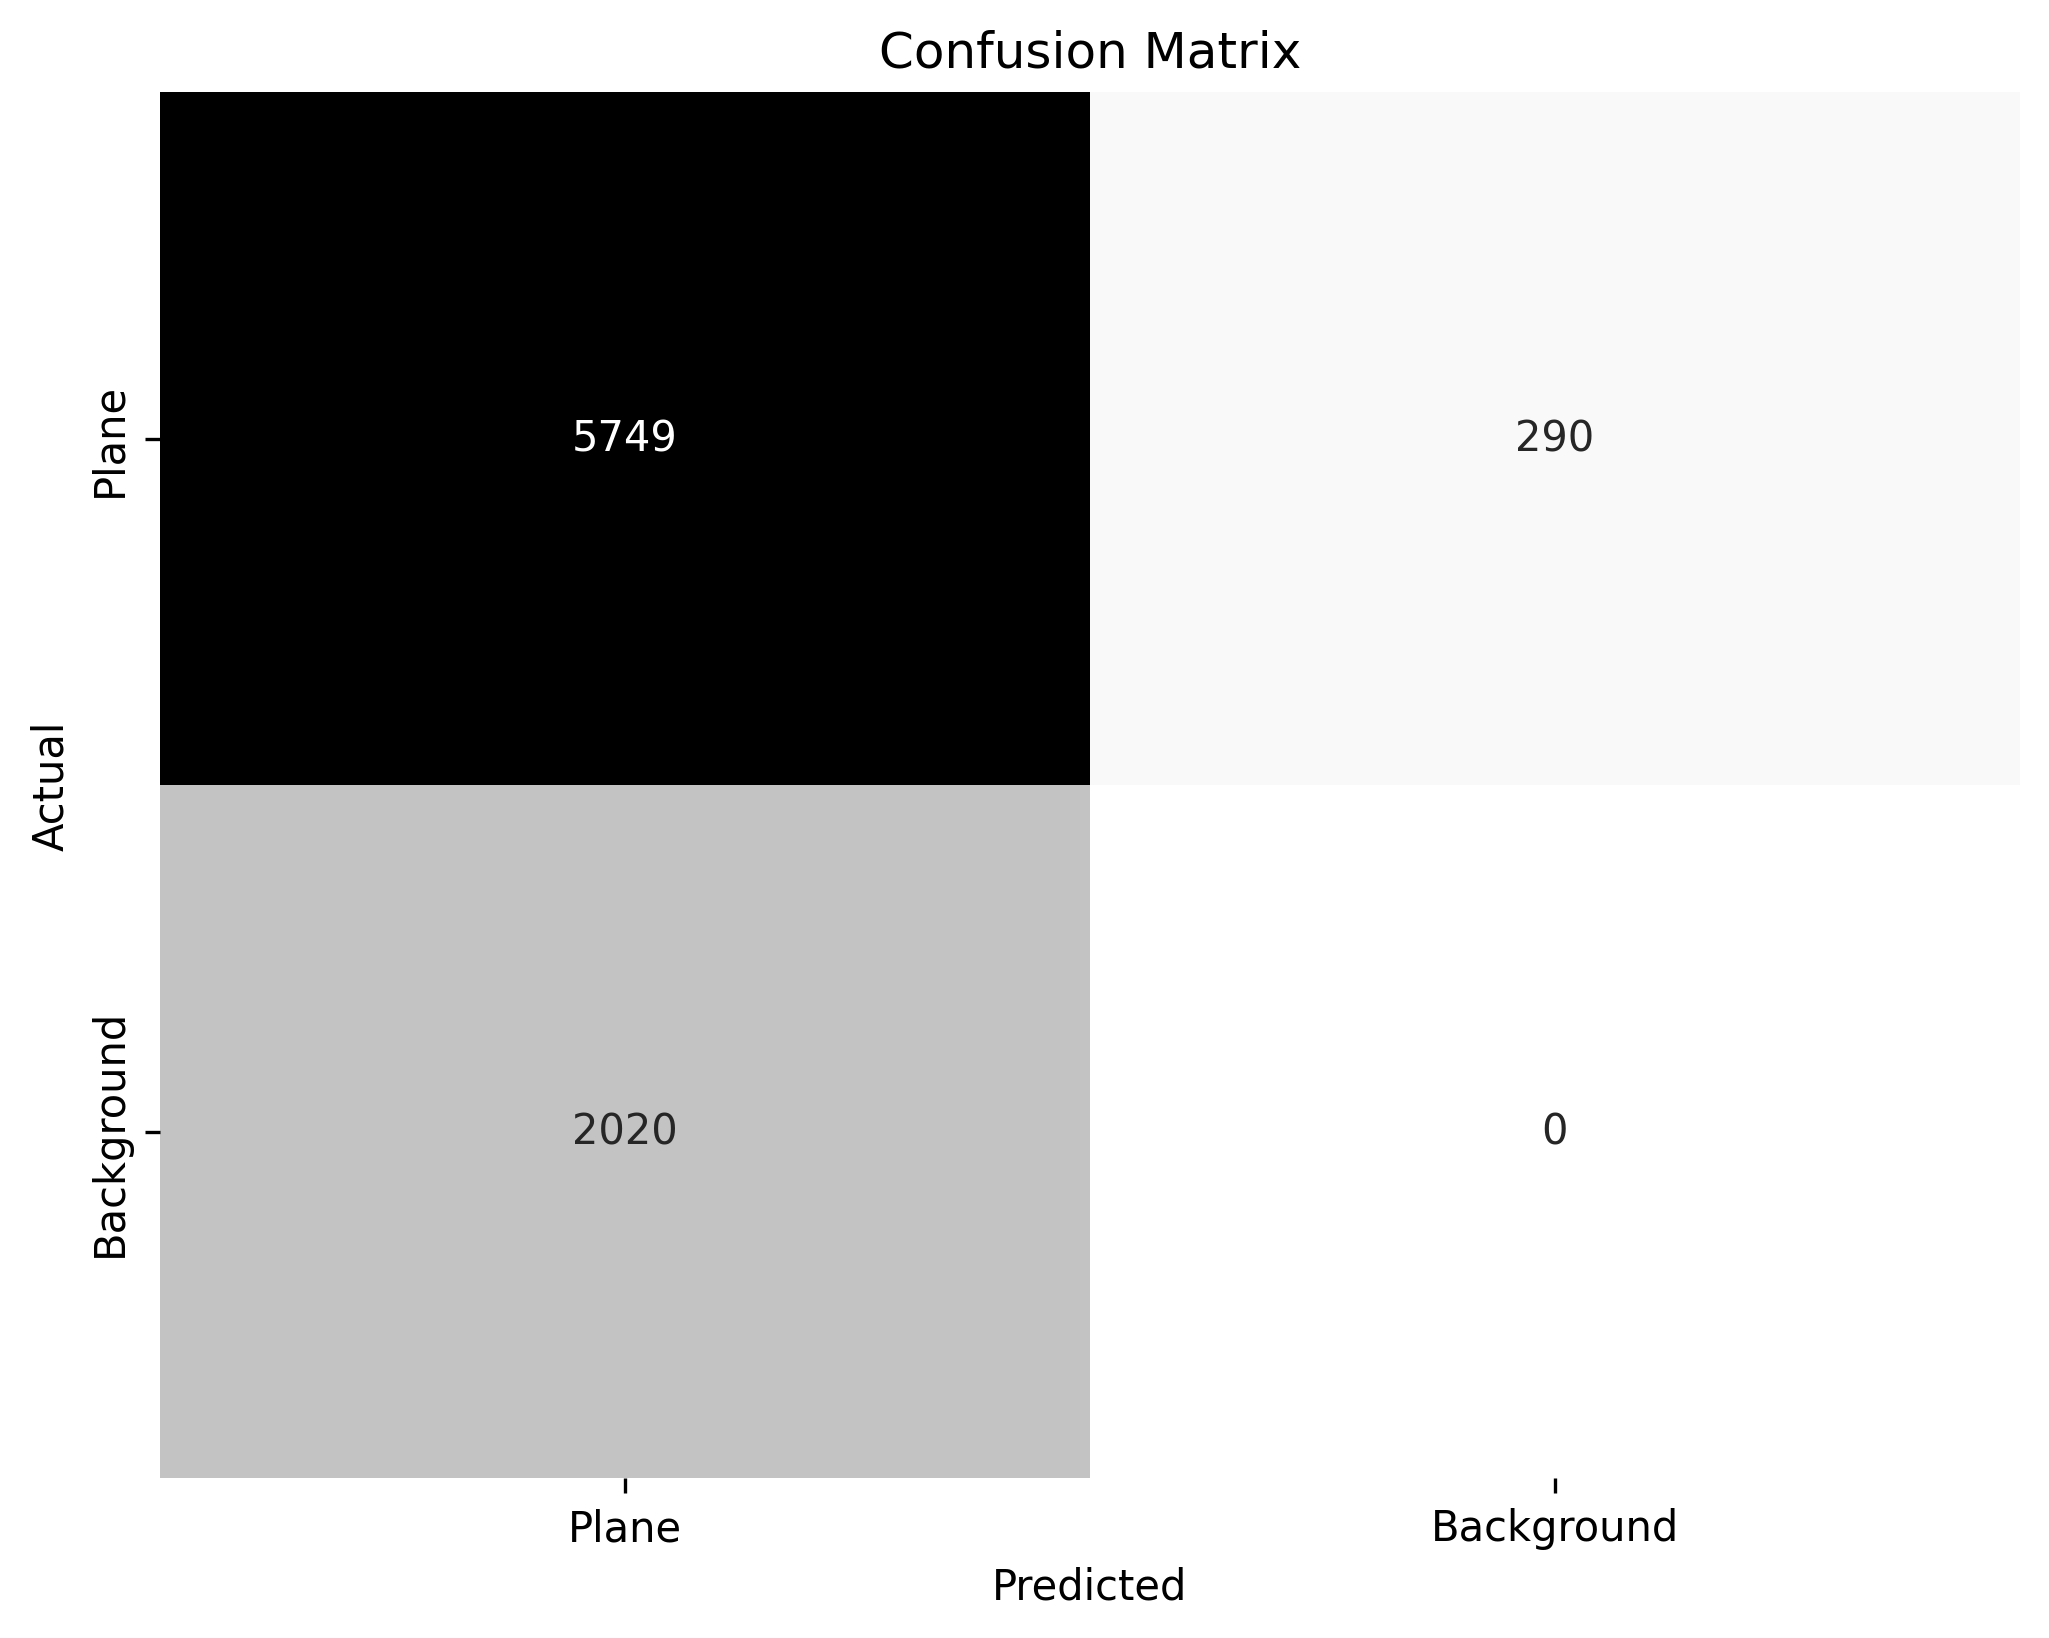

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.7134


### **1.5. Validate Model 5**

In [ ]:
model = YOLO(MODEL_5_PT)
metrics = model.val(data='/content/coco_test.yaml')

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:28<00:00,  3.83it/s]


                   all       1722       7769      0.902      0.715      0.822      0.427
Speed: 0.6ms preprocess, 2.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val5


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.8217 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.3856 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.4267 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9018 - Mean Precision of all classes.
metrics.box.mr: 0.7151 - Mean Recall of all classes.
metrics.box.p: 0.9018 - Precision for each class.
metrics.box.r: 0.7151 - Recall for each class.
metrics.box.f1: 0.7977 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.9018 - Percentage of correct positive predictions.
Recall: 0.7151 - Percentage of actual positives that were correctly predicted.
mAP50: 0.8217 - Mean Average Precision at 50% IOU.
mAP50-95: 0.4267 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.7977 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

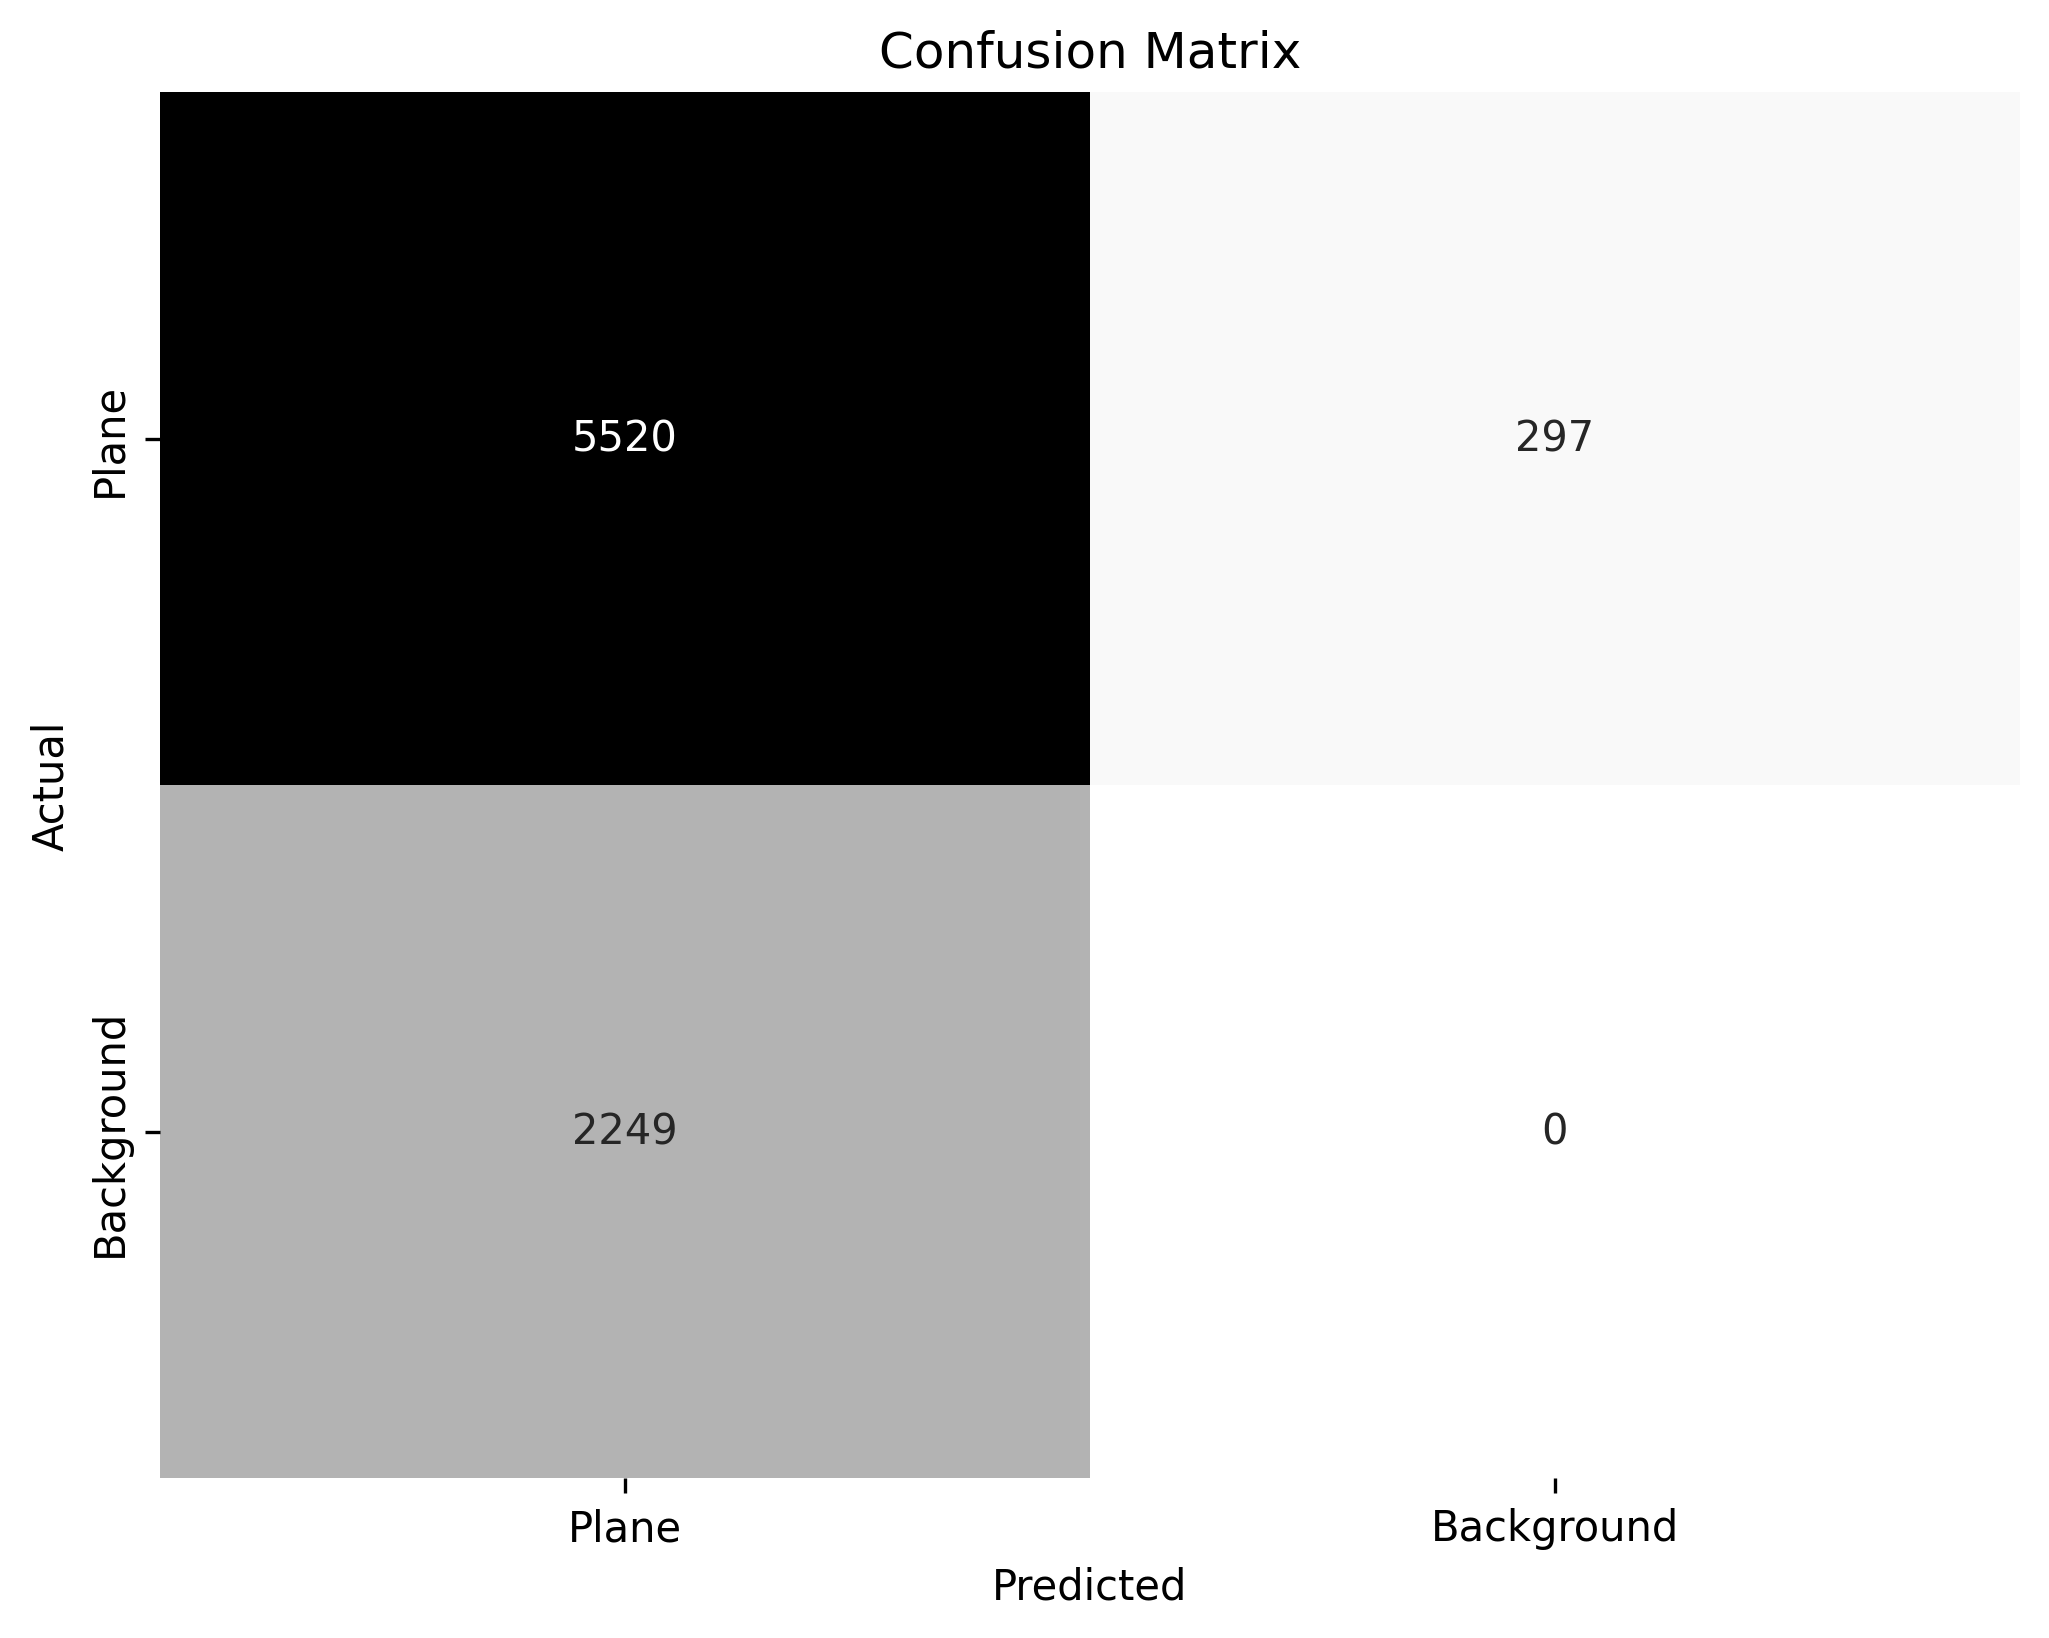

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.6844


### **1.6. Validate Model 6**

In [ ]:
model = YOLO(MODEL_6_PT)
metrics = model.val(data='/content/coco_test.yaml')

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 28.0MB/s]
val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [17:22<00:00,  1.65it/s]


val: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [04:40<00:00,  2.60s/it]


                   all       1722       7769      0.895      0.723      0.823      0.426
Speed: 0.9ms preprocess, 153.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.8230 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.3840 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.4264 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.8952 - Mean Precision of all classes.
metrics.box.mr: 0.7235 - Mean Recall of all classes.
metrics.box.p: 0.8952 - Precision for each class.
metrics.box.r: 0.7235 - Recall for each class.
metrics.box.f1: 0.8002 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

metrics_dict = {}
for key, value in metrics.results_dict.items():
    attribute = next((desc for attr, desc in attributes if attr == key), None)
    metrics_dict[key] = {
        "value": value,
        "description": attribute if attribute is not None else "No description available"
    }

Precision: 0.8952 - Percentage of correct positive predictions.
Recall: 0.7235 - Percentage of actual positives that were correctly predicted.
mAP50: 0.8230 - Mean Average Precision at 50% IOU.
mAP50-95: 0.4264 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.8002 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

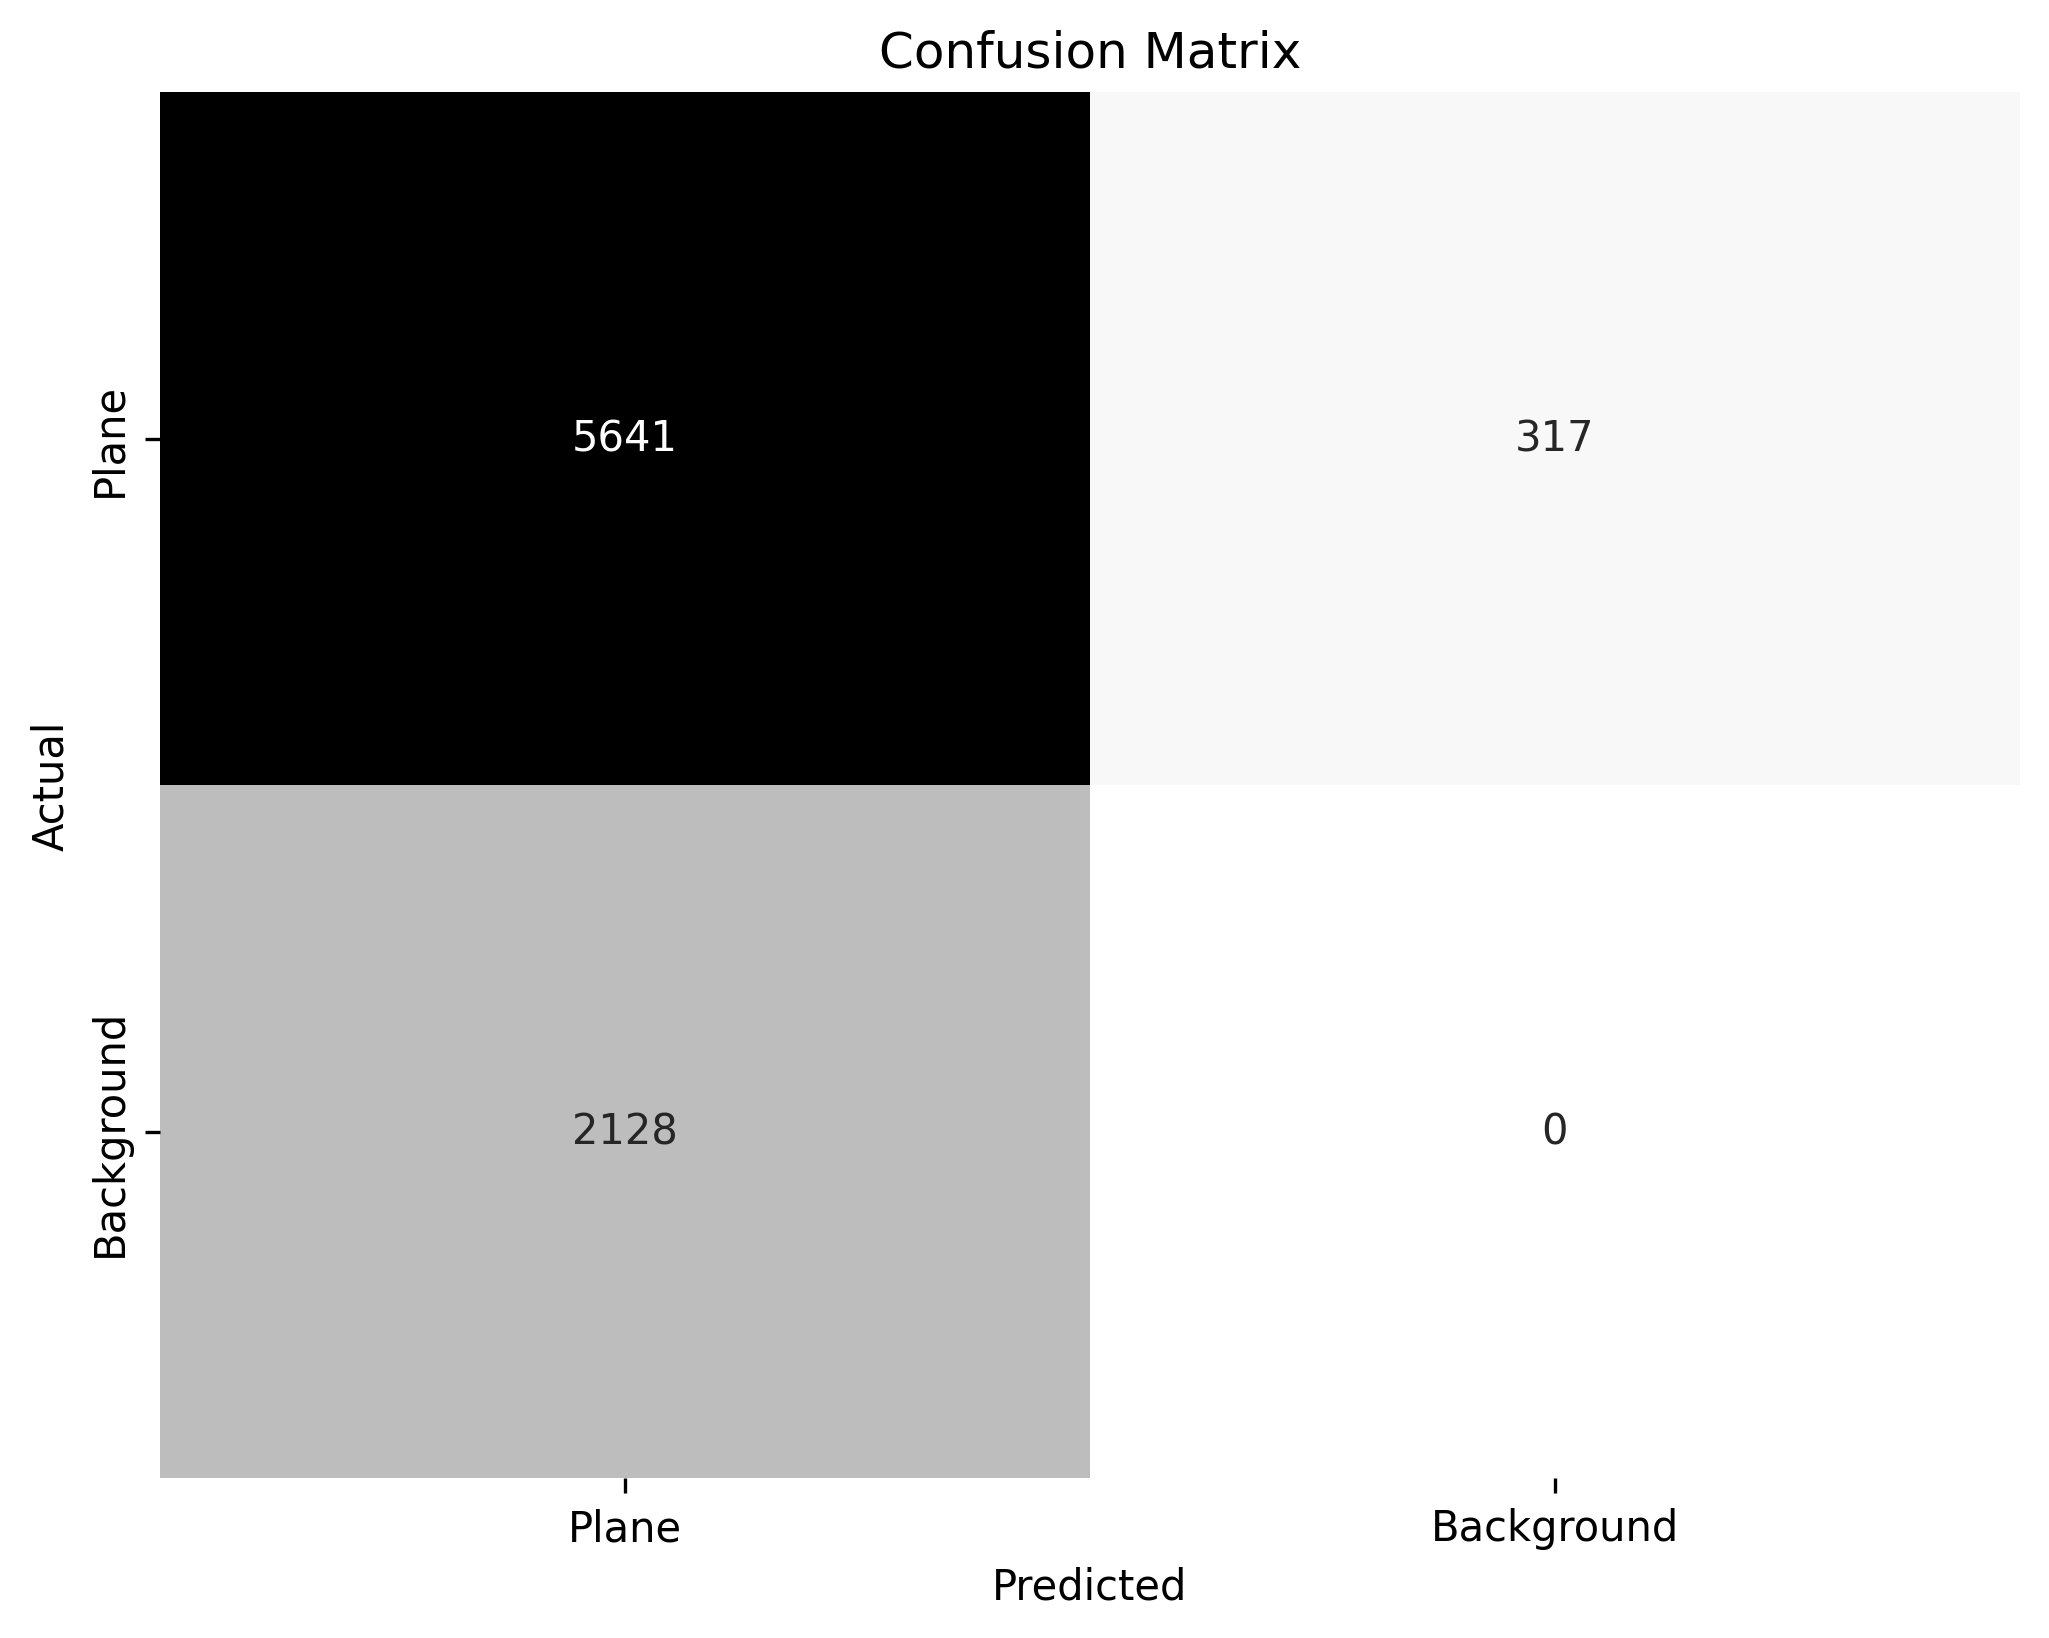

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.6976


## **3. Move Model Items into Google Drive**

Instead of uploading and downloading files, we can directly move them to the desired path.

In [ ]:
shutil.move("/content/runs/detect/", "/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/CORS_AD_HBB/outputs/")

'/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/CORS_AD_HBB/detect'

In [ ]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2024-08-02 17:21:10
